<font size=10><center>**Data Processing for the Airbnb Berlin Dataset from http://insideairbnb.com/berlin**</center></font>

##### 
Qustions we want to answer with the Data Sets:
1. **What's the average price per (grouped) neighborhood in Berlin?**
2. **What's the occupancy rate of active airbnb listings in Berlin?**
3. **What's the average revenue of active airbnb listings in Berlin?**
4. **How does this compare to the average revenue from normal rent in those distircts?**
5. **How volatile is the income throughout the year?****


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

#This allows for multiple outputs from one cell to be shown 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)

import os
os.chdir('C:/Users/felix/Desktop/NanoDegree')

# Magic Functions
%matplotlib inline

In [2]:
print(sns.__version__)

0.11.0


# Functions:

In [3]:
def price_s2f(df, cols):
    """
    INPUT:
    df - the pandas dataframe containing the string price values
    cols - list of string prices
    
    OUTPUT:
    df - returns back the original dataframe with price columns as floats
    """
    for col in cols:
        if df[col].dtype == ('O'):
            df.loc[:,col] = [re.sub("[^0-9 .]", "", i) for i in df[col]] 
            df[col] = df[col].astype(float)
    return

def ft_to_01(x):
    '''
    replace f / t with 0 / 1
    '''
    if x=='f':
        x=x.replace('f','0')
    elif x=='t':
        x=x.replace('t','1')
    else:
        x= '0'
    return int(x)

def ftBool_2_intBoolean(df, str_boolean_col):
    '''
    # Change the string_boolean (t / f) into int_boolean (1/0)
    ''' 
    if (set(df[str_boolean_col])=={'t','f'}):
        df[str_boolean_col]=df[str_boolean_col].apply(ft_to_01)
    return    

# Checking out: Listings Data

In this section, the data regarding each listing of Airbnb will be ingested and processed for future analysis.

The listing data holds information about each listing, such has review scores, verifications, requirements, amenities, type of property, bed, room, and much more.

### Read in columns with first 100 rows, check for columns of interest and read in those columns incl. all rows

In [4]:
column_check = pd.read_csv('listings.csv', nrows=100)
column_check.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [5]:
column_check.sample(2) 

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
57,87549,https://www.airbnb.com/rooms/87549,20201013162227,2020-10-19,Independent room in green Kreuzberg,quiet and nice attic room with antique furnitu...,Our building is located southeast of Potsdamer...,https://a0.muscache.com/pictures/25374035/be6c...,81113,https://www.airbnb.com/users/show/81113,Carol,2010-02-14,"Berlin, Berlin, Germany","French, living in Berlin for over 20 years, ve...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/81113/profile...,https://a0.muscache.com/im/users/81113/profile...,Kreuzberg,1,1,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Germany",Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,52.49616,13.37397,Private room in apartment,Private room,2,NaN,1 private bath,1.0,1,"[""Wifi"", ""Patio or balcony"", ""Hangers"", ""Refri...",$51.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,0,79,2020-10-19,223,18,0,2011-05-02,2020-09-06,95.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,1,0,1,0,1.93
9,21869,https://www.airbnb.com/rooms/21869,20201013162227,2020-10-19,Studio in the Heart of Kreuzberg,Light and sunny 1-Room-turn of the century-fla...,Our Part of Kreuzberg is just the best. Good v...,https://a0.muscache.com/pictures/435605/4e86bb...,64696,https://www.airbnb.com/users/show/64696,Rene,2009-12-20,"Santa Cruz, California, United States",Friendly and social. Likes to travel and enjoy...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/64696/profile...,https://a0.muscache.com/im/users/64696/profile...,Kreuzberg,4,4,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,f,"Berlin, Germany",nördliche Luisenstadt,Friedrichshain-Kreuzberg,52.50273,13.43462,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,2,"[""Wifi"", ""Iron"", ""Hangers"", ""Kitchen"", ""Childr...",$70.00,60,365,60,60,365,365,60.0,365.0,NaN,t,0,0,16,291,2020-10-19,60,0,0,2010-09-23,2016-06-05,95.0,9.0,10.0,10.0,9.0,9.0,9.0,NaN,f,2,2,0,0,0.49


In [6]:
## Read in columns evaluated as relevant for this project
df = pd.read_csv('listings.csv', usecols= [
       'id',
       'host_id',
       "last_scraped",
       'host_since', 
       'host_response_time', 
       'host_response_rate', 
       'host_acceptance_rate',
       'host_is_superhost', 
       'host_neighbourhood', 
       'host_listings_count',
       'host_total_listings_count', 
       'host_verifications',
       'host_has_profile_pic', 
       'host_identity_verified', 
       'neighbourhood',
       'neighbourhood_cleansed', 
       'neighbourhood_group_cleansed', 
       'latitude',
       'longitude', 
       'property_type', 
       'room_type', 
       'accommodates', 
       'bedrooms', 
       'beds', 
       'amenities', 
       'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 
       'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 
       'first_review', 'last_review', 'review_scores_rating', 
       'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'reviews_per_month',
       'calculated_host_listings_count_shared_rooms'
       ], parse_dates=[
    "host_since", 
    "first_review",
    "last_review", 
    "last_scraped"])

In [7]:
df.describe()

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.022700e+04,2.022700e+04,20215.000000,20215.000000,20227.000000,20227.000000,20227.000000,18542.000000,19975.000000,20227.000000,20227.000000,20224.000000,20224.000000,20224.000000,2.022400e+04,20224.000000,2.022400e+04,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,16053.000000,16034.000000,16035.000000,16021.000000,16032.000000,16023.000000,16020.000000,20227.000000,20227.000000,20227.000000,20227.000000,16460.000000
mean,2.361542e+07,8.551713e+07,3.870047,3.870047,52.510246,13.404865,2.741781,1.275105,1.657822,7.990063,595.667227,7.802215,8.314676,703.659662,2.130797e+05,8.070372,2.120997e+05,6.900826,15.518663,25.023434,87.639294,23.140258,4.503832,0.312701,94.686165,9.680554,9.338759,9.741215,9.745010,9.619110,9.407928,2.823108,1.818362,0.724428,0.175706,0.843584
std,1.372947e+07,9.821869e+07,28.348926,28.348926,0.031903,0.062069,1.634844,0.770936,1.593302,30.525101,542.864669,30.110675,30.849713,556.742415,2.135504e+07,30.277879,2.125686e+07,11.061873,23.259738,34.938178,128.382964,48.747977,10.307596,1.083829,7.849939,0.774274,1.036922,0.709446,0.712997,0.734445,0.865050,6.521288,5.800622,1.435346,2.207266,1.218423
min,2.015000e+03,1.581000e+03,0.000000,0.000000,52.340410,13.098390,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.181564e+07,1.079583e+07,1.000000,1.000000,52.489590,13.369115,2.000000,1.000000,1.000000,2.000000,23.000000,1.000000,2.000000,30.000000,3.000000e+01,2.000000,3.000000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,93.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.120000
50%,2.267455e+07,4.129505e+07,1.000000,1.000000,52.510130,13.414540,2.000000,1.000000,1.000000,3.000000,730.000000,3.000000,3.000000,1125.000000,1.125000e+03,3.000000,1.125000e+03,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.360000
75%,3.633792e+07,1.320462e+08,2.000000,2.000000,52.533000,13.439005,3.000000,1.000000,2.000000,4.000000,1125.000000,4.000000,5.000000,1125.000000,1.125000e+03,4.700000,1.125000e+03,14.000000,36.000000,57.000000,158.000000,20.000000,4.000000,0.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,1.000000,0.000000,1.010000
max,4.585497e+07,3.714961e+08,1130.000000,1130.000000,52.655980,13.757580,16.000000,50.000000,96.000000,1124.000000,9999.000000,1124.000000,1124.000000,9999.000000,2.147484e+09,1124.000000,2.137610e+09,30.000000,60.000000,90.000000,365.000000,568.000000,231.000000,44.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,67.000000,67.000000,20.000000,38.000000,20.630000


### Currency --> convert String to float

In [8]:
df["price"].sample(5)

19841    $82.00
18683    $90.00
4222     $70.00
1093     $99.00
19518    $26.00
Name: price, dtype: object

In [9]:
# price_s2f removes all non numeric strings from paand turns remainder into float
price_s2f(df, ["price"])
df["price"].sample(5)

14934     83.00
8159      35.00
3999      80.00
1394     251.43
5848      35.00
Name: price, dtype: float64

### Handle missing values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20227 entries, 0 to 20226
Data columns (total 58 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            20227 non-null  int64         
 1   last_scraped                                  20227 non-null  datetime64[ns]
 2   host_id                                       20227 non-null  int64         
 3   host_since                                    20215 non-null  datetime64[ns]
 4   host_response_time                            10054 non-null  object        
 5   host_response_rate                            10054 non-null  object        
 6   host_acceptance_rate                          13053 non-null  object        
 7   host_is_superhost                             20215 non-null  object        
 8   host_neighbourhood                            14547 non-null  obje

In [11]:
df.columns[df.isna().sum()/df.shape[0] > 0.50]

Index(['host_response_time', 'host_response_rate', 'license'], dtype='object')

In [12]:
# The columns 'host_response_time', 'host_response_rate', 'license' have more than 50% of missing values
# As they do not seem to be relevant for our business questions, we'll drop them:
df = df.drop(['host_response_time', 'host_response_rate', 'license'], axis=1)

### Availability of listings
#### Considering the business questions, we are only interested in listings with high availability 



In [13]:
df.availability_365.describe()

count    20227.000000
mean        87.639294
std        128.382964
min          0.000000
25%          0.000000
50%          0.000000
75%        158.000000
max        365.000000
Name: availability_365, dtype: float64

In [14]:
df.availability_365

0        180
1        353
2        293
3          0
4         29
        ... 
20222      0
20223      5
20224      0
20225    352
20226    165
Name: availability_365, Length: 20227, dtype: int64

In [15]:
#Let's check if the database is big enough for listings with "high" availability

df.loc[(df.availability_365 < df.number_of_reviews)]

,id,last_scraped,host_id,host_since,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3,7071,2020-10-19,17391,2009-05-16,97%,t,Prenzlauer Berg,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Germany",Helmholtzplatz,Pankow,52.54316,13.41509,Private room in apartment,Private room,2,1.0,2.0,"[""Wifi"", ""Hangers"", ""Refrigerator"", ""Extra pil...",33.00,1,10,1.0,1.0,10.0,10.0,1.0,10.0,t,0,0,0,0,293,32,0,2009-08-18,2020-03-31,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,1,0,1,0,2.15
11,22677,2020-10-19,87357,2010-03-02,100%,t,Mitte,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Germany",Brunnenstr. Süd,Mitte,52.53435,13.40558,Entire apartment,Entire home/apt,5,1.0,4.0,"[""Garden or backyard"", ""Washer"", ""Single level...",160.00,2,24,2.0,2.0,1125.0,1125.0,2.0,1125.0,t,30,60,90,270,309,28,0,2010-10-10,2020-08-07,95.0,10.0,10.0,10.0,10.0,10.0,9.0,f,1,1,0,0,2.53
12,23834,2020-10-21,94918,2010-03-17,0%,f,Kreuzberg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Germany",Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,52.48971,13.37975,Entire condominium,Entire home/apt,4,1.0,3.0,"[""Extra pillows and blankets"", ""Room-darkening...",65.00,185,360,185.0,185.0,360.0,360.0,185.0,360.0,t,0,0,0,0,100,2,0,2013-12-16,2020-02-06,90.0,9.0,9.0,10.0,9.0,9.0,9.0,f,1,1,0,0,1.20
14,25653,2020-10-20,99662,2010-03-27,80%,f,Prenzlauer Berg,2.0,2.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,Prenzlauer Berg Süd,Pankow,52.53026,13.41947,Entire apartment,Entire home/apt,4,2.0,2.0,"[""Wifi"", ""Kitchen"", ""Washer"", ""Elevator"", ""Pai...",90.00,4,21,4.0,4.0,21.0,21.0,4.0,21.0,t,0,0,0,0,5,0,0,2010-09-07,2016-08-14,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2,2,0,0,0.04
18,33043,2020-10-19,143180,2010-06-12,100%,f,Moabit,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,NaN,Moabit Ost,Mitte,52.52195,13.35590,Entire apartment,Entire home/apt,4,1.0,2.0,"[""Room-darkening shades"", ""Washer"", ""TV"", ""Mic...",74.00,3,1125,3.0,5.0,1125.0,1125.0,3.1,1125.0,t,22,38,55,55,211,24,0,2010-08-19,2020-08-30,90.0,10.0,9.0,9.0,10.0,10.0,9.0,t,1,1,0,0,1.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20075,45617365,2020-10-17,180495381,2018-03-25,64%,f,NaN,5.0,5.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,t,NaN,Düsseldorfer Straße,Charlottenburg-Wilm.,52.49580,13.32923,Entire apartment,Entire home/apt,3,NaN,2.0,"[""Hangers"", ""Cable TV"", ""Hot water"", ""Paid par...",55.00,15,1125,15.0,15.0,1125.0,1125.0,15.0,1125.0,t,0,0,0,0,1,1,1,2020-10-05,2020-10-05,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,4,4,0,0,1.00
20082,45617616,2020-10-21,369058520,2020-09-24,100%,f,NaN,0.0,0.0,['phone'],t,f,"Berlin, Germany",Alexanderplatz,Mitte,52.52839,13.38080,Entire apartment,Entire home/apt,6,2.0,3.0,"[""Elevator"", ""Single level home"", ""TV"", ""Dishe...",58.00,2

##### Insight: 4k rows for listings with >200 days/year seems good enough for a first analysis. Let's keep all the data for now to be more flexible during analysis

### Number of reviews
 #### To make sure we are only considering active hosts we will filter for those with at least one review:

In [16]:
df.loc[(df.number_of_reviews > 0)]['reviews_per_month'].describe()

count    16460.000000
mean         0.843584
std          1.218423
min          0.010000
25%          0.120000
50%          0.360000
75%          1.010000
max         20.630000
Name: reviews_per_month, dtype: float64

In [17]:
#We'll consider listings with no reviews as "dead" listings 
#or very new listings. Thus we will drop them:

df = df.loc[(df.number_of_reviews > 0)]

### Property type

In [18]:
#turns out "porperty_type" has too many variants to make things look neat
df.property_type.value_counts()

Entire apartment             7890
Private room in apartment    6384
Entire loft                   320
Entire condominium            265
Entire serviced apartment     205
                             ... 
Shared room in boat             1
Private room in cottage         1
Private room in tipi            1
Treehouse                       1
Entire home/apt                 1
Name: property_type, Length: 61, dtype: int64

In [19]:
# luckly "room_type" has the granularity we need: 
df.room_type.value_counts()

Entire home/apt    9002
Private room       7079
Shared room         213
Hotel room          166
Name: room_type, dtype: int64

In [20]:
# lets keep it simple and only estimate revenue for Entire home/apt & Private room:
df = df.loc[(df.room_type == "Entire home/apt") | (df.room_type == "Private room")]

### Neighbourhoods
After a quick check it turns out that "neighbourhood_group_cleansed" carries the granularity best suited for our case. Number of highly available listings is still for most neighbourhoods:

In [21]:
pd.set_option('display.max_rows', 100)
df.loc[(df.availability_365 > 200)]['neighbourhood_group_cleansed'].value_counts()

Mitte                       753
Friedrichshain-Kreuzberg    605
Pankow                      520
Charlottenburg-Wilm.        329
Neukölln                    277
Tempelhof - Schöneberg      254
Treptow - Köpenick          109
Steglitz - Zehlendorf        85
Lichtenberg                  83
Reinickendorf                61
Spandau                      41
Marzahn - Hellersdorf        34
Name: neighbourhood_group_cleansed, dtype: int64

In [22]:
df.neighbourhood_group_cleansed.value_counts()

Friedrichshain-Kreuzberg    3738
Mitte                       3375
Pankow                      2623
Neukölln                    2320
Charlottenburg-Wilm.        1245
Tempelhof - Schöneberg      1078
Treptow - Köpenick           482
Lichtenberg                  478
Steglitz - Zehlendorf        309
Reinickendorf                231
Spandau                      105
Marzahn - Hellersdorf         97
Name: neighbourhood_group_cleansed, dtype: int64

In [23]:
#Let's check how many % of listings have over 200 nights/year availability and 
#are thus mainly used to generate additional income:
((df.loc[(df.availability_365 > 200)]['neighbourhood_group_cleansed'].value_counts())/df.neighbourhood_group_cleansed.value_counts()).round(3)

Charlottenburg-Wilm.        0.264
Friedrichshain-Kreuzberg    0.162
Lichtenberg                 0.174
Marzahn - Hellersdorf       0.351
Mitte                       0.223
Neukölln                    0.119
Pankow                      0.198
Reinickendorf               0.264
Spandau                     0.390
Steglitz - Zehlendorf       0.275
Tempelhof - Schöneberg      0.236
Treptow - Köpenick          0.226
Name: neighbourhood_group_cleansed, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='room_type', ylabel='price'>

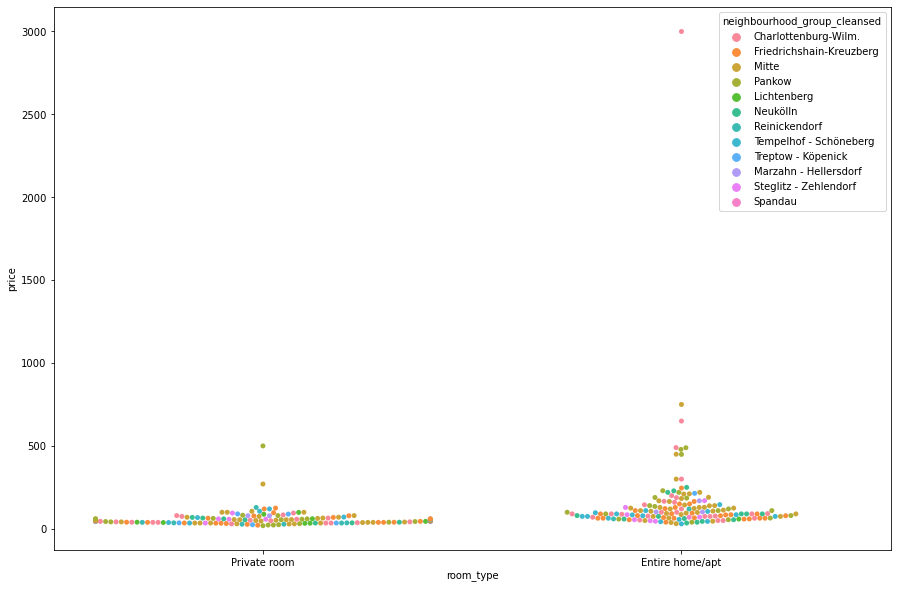

In [24]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
sns.swarmplot(data=df, x=df.loc[
    (df.availability_365 > 364)]["room_type"], y=df.loc[
    (df.availability_365 > 364)]['price'], hue= df.loc[
    (df.availability_365 > 364)]['neighbourhood_group_cleansed'], ax=ax)

<AxesSubplot:xlabel='room_type', ylabel='price'>

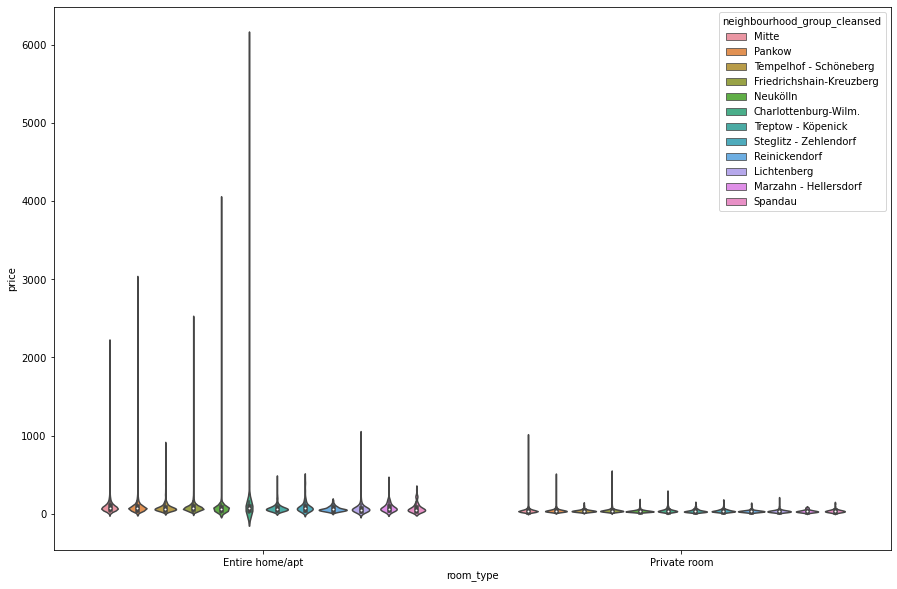

In [25]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
sns.violinplot(data=df, x="room_type", y="price", hue="neighbourhood_group_cleansed", ax=ax)

### Removing price outliers:

##### As seen in the plots above, some listings have very steep pricings / night. They might distort our statistical analysis. Thus, we will drop the outliers:

<AxesSubplot:xlabel='price'>

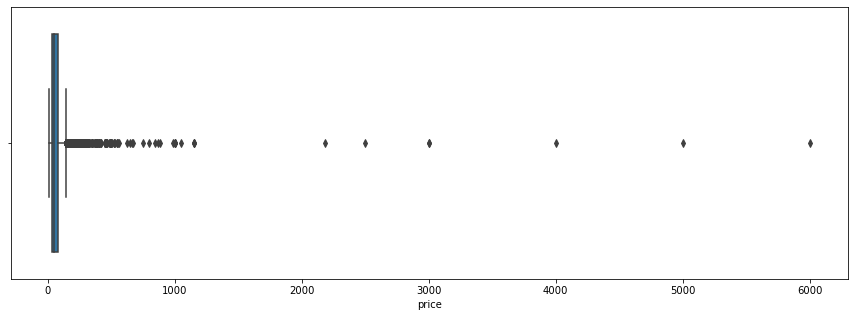

In [26]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x = df.price)

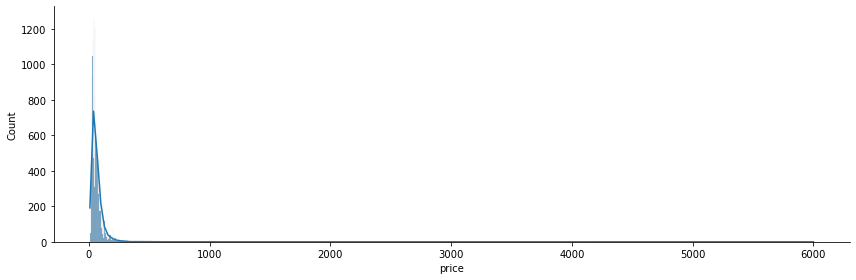

In [27]:
sns.displot(df.price, kde=True, height=4,aspect=3)

In [28]:
print("The Percentage of outliers over 400$ is {0:.2f}%".format(df[df.price > 400].id.count() / len(df) * 100))

The Percentage of outliers over 400$ is 0.37%


In [29]:
#Let's drop the outlier listings that cost more than 400$ per night:
df = df[(df.price < 400)]

## Now we'll use the given columns to derive some more insights that might turn out to be useful during our analysis:

#### Create Column: Duration as a host 

In [30]:
df['host_since'] = pd.to_datetime(df['host_since']).dt.floor('d')
df['last_scraped'] = pd.to_datetime(df['last_scraped']).dt.floor('d')

In [31]:
#Turns out we have some hosts in the dataset without a "host since" date. Its only 7, so let's drop them:
df.host_since.isna().sum()
df = df[~df.host_since.isna()]

7

In [32]:
df["host_4_Xdays"] = (df.last_scraped - df.host_since)
df["host_4_Xdays"] = df["host_4_Xdays"].apply(lambda x: x.days)
df["host_4_Xdays"].head()

0    4447
1    4384
2    4366
3    4174
4    4074
Name: host_4_Xdays, dtype: int64

In [33]:
df["host_4_Xdays"] = (df.last_scraped - df.host_since)
df["host_4_Xdays"] = df["host_4_Xdays"].apply(lambda x: x.days)
df["host_4_Xdays"].sample(5)

1361     2402
12139    1441
2008     3219
1972     2211
19142    1730
Name: host_4_Xdays, dtype: int64

### Write listings to file:

In [34]:
df.to_csv('listings_processed.csv', index=False)

# Checking out: Calendar Data

In [35]:
Calendar_df = pd.read_csv('calendar.csv')
Calendar_df.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [36]:
#For ease of analysis we convert the
#column "available" from str_boolean to binary_boolean using the function created up top:
ftBool_2_intBoolean(Calendar_df, 'available')

In [37]:
#There are 3 listings without a price. As no price seems unreasonable we will drop them:
print("There are {} listings without a price.".format(Calendar_df[(Calendar_df["price"].isna() == True)].listing_id.nunique()))

Calendar_df = Calendar_df[(Calendar_df["price"].isna() == False)]

There are 3 listings without a price.


In [38]:
#Cleaning price columns:
price_s2f(Calendar_df, ["price", "adjusted_price"])
Calendar_df.sample(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
1992736,12641723,2021-08-04,0,50.0,50.0,1.0,1125.0
5790601,38035914,2021-02-23,0,49.0,49.0,1.0,20.0
2689578,17913105,2021-09-27,0,60.0,60.0,6.0,22.0
588256,3525306,2020-10-20,0,70.0,70.0,1.0,1125.0
1918159,12226714,2021-08-25,0,25.0,25.0,3.0,1125.0


## Let's derive some new columns from our Calendar Data:

### Availability

#### It might be useful to assign each listing_id the amount of days it's available. We might be able to use it to estimate a listings revenue:

In [39]:
#We can see here that the Calander Data is only showing FUTURE availability for listing.
#It might still be useful for us to predict future earnings of those listings with very high availability.
Calendar_df.date.min()
Calendar_df.date.max()

'2020-10-13'

'2021-10-23'

In [40]:
#The Calendar Data of each listing was scraped for approx. 1 year. 2 listings fall out of line with ~180 datapoints. 
temp = Calendar_df.groupby(['listing_id'])['available'].count().reset_index()

temp.loc[temp.available <365]
temp.loc[temp.available >=365]
temp.available.max()

#We'll drop them as they have no days available in the future --> most likley inactive.
Calendar_df.loc[(Calendar_df.listing_id == 21627714) & (Calendar_df.listing_id == 40320470)]['available'].sum()
Calendar_df = Calendar_df.loc[(Calendar_df.listing_id != 21627714) & (Calendar_df.listing_id != 40320470)]

,listing_id,available
9557,21627714,182
16954,40320470,185


,listing_id,available
0,2015,365
1,3176,365
2,3309,365
3,7071,365
4,9991,365
...,...,...
20219,45845921,365
20220,45847669,365
20221,45851885,365
20222,45854853,365


367

0

In [41]:
#Let's add a column indicating the sum of days a listing is still available next year - 
#this can later on be used to e.g. filter for active listings, assuming that no listing is fully booked a year in advance:
Calendar_df = Calendar_df.join(Calendar_df.groupby(['listing_id'])['available'].sum(), on = 'listing_id', rsuffix = '_days_next_year')
Calendar_df = Calendar_df.rename(columns={'available_days_next_year' : '\"still\"_available_days_next_year'})
Calendar_df.sample(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,"""still""_available_days_next_year"
4772750,30762579,2021-05-26,0,130.0,130.0,3.0,1125.0,0
6097170,39334582,2021-07-21,0,38.0,38.0,2.0,31.0,257
4542463,29117399,2021-04-01,0,69.0,69.0,3.0,1125.0,0
244404,979758,2021-02-17,1,49.0,49.0,1.0,31.0,165
3397681,21220761,2021-06-09,0,40.0,40.0,3.0,1125.0,0


### Price

In [42]:
#The price of listings is not constant over time.
#This is also important to understand for the price "estimate" in our listings df.
Calendar_df.loc[Calendar_df['price'] != Calendar_df['adjusted_price']].groupby(
    ['listing_id']).agg({'price':'describe', 'adjusted_price':'describe'})

price                                                             \
            count        mean        std    min    25%    50%     75%    max   
listing_id                                                                     
54952       335.0   45.877612   1.852319   39.0   44.0   47.0   47.00   47.0   
128827      335.0   59.000000   0.000000   59.0   59.0   59.0   59.00   59.0   
135097      186.0  106.225806  20.025999   75.0   75.0  119.0  119.00  119.0   
159454      185.0  161.000000   0.000000  161.0  161.0  161.0  161.00  161.0   
242978       15.0   50.933333   6.776711   43.0   45.0   51.0   56.00   62.0   
...           ...         ...        ...    ...    ...    ...     ...    ...   
45399432      2.0   40.000000   0.000000   40.0   40.0   40.0   40.00   40.0   
45406834     57.0   53.368421   2.192777   47.0   54.0   54.0   54.00   55.0   
45406909     56.0   53.303571   2.396358   47.0   54.0   54.0   54.25   55.0   
45477471    364.0   54.247253   0.593229   51.0   54.0   54.0   55.00   55.0   
45617365      2.0   59.000000   0.000000   59.0   59.0   59.0   59.00   59.0   

           adjusted_price                                                     \
                    count        mean        std    min    25%    50%    75%   
listing_id                                                                     
54952               335.0   41.197015   1.454908   35.0   40.0   42.0   42.0   
128827              335.0   53.000000   0.000000   53.0   53.0   53.0   53.0   
135097              186.0  104.876344  21.111564    9.0   74.0  118.0  118.0   
159454              185.0  129.000000   0.000000  129.0  129.0  129.0  129.0   
242978               15.0   41.000000   4.140393   36.0   37.0   42.0   43.0   
...                   ...         ...        ...    ...    ...    ...    ...   
45399432              2.0   39.000000   0.000000   39.0   39.0   39.0   39.0   
45406834             57.0   31.000000   3.560698   27.0   29.0   29.0   32.0   
45406909             56.0   30.767857   3.761001   26.0   29.0   29.0   32.5   
45477471            364.0   49.692308   8.360266   27.0   53.0   53.0   53.0   
45617365              2.0   57.000000   0.000000   57.0   57.0   57.0   57.0   

                   
              max  
listing_id         
54952        42.0  
128827       53.0  
135097      118.0  
159454      129.0  
242978       50.0  
...           ...  
45399432     39.0  
45406834     37.0  
45406909     37.0  
45477471     54.0  
45617365     57.0  

[546 rows x 16 columns]

In [ ]:
#adjusted_price is not simply the mean price of a listing - as I'm uncertain what the column describes we are going 
#to drop it and replace it with a year_avg_price column:
Calendar_df = Calendar_df.drop(Calendar_df['adjusted_price'])

In [ ]:
Calendar_df = Calendar_df.join(Calendar_df.groupby(['listing_id']).agg({'price': 'mean'}), on = 'listing_id', rsuffix = '_mean')
Calendar_df = Calendar_df.rename(columns={'price_mean' : 'year_avg_price'})
Calendar_df.sample(5)

### Write Calendar Data to file:

In [ ]:
Calendar_df.to_csv('Calendar_processed.csv', index=False)

# Checking out: Reviews Data

In [ ]:
review_df = pd.read_csv('reviews.csv')
review_df.columns

In [ ]:
review_df.head()

In [ ]:
review_df = review_df.join(review_df.groupby(['listing_id']).agg({'id':'count'}), on = 'listing_id', rsuffix = '_sum')

In [ ]:
review_df

#### Id_sum is alread included in the listings df under number_of_reviews. Thus we dont need the reviews dataframe for out analysis.